# Library

In [1]:
import os
import re
import shutil 
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import cumtrapz

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('default')

%matplotlib inline

parameters = {'savefig.format': 'pdf',
    
              'figure.figsize':(8,8),
              'axes.labelsize': 35,
              'axes.titlesize': 35,
              'xtick.labelsize': 35,
              'ytick.labelsize': 35,
              'legend.fontsize': 33,
              'legend.frameon': False,
              'axes.linewidth': 3,
              'lines.linewidth': 3.5,
              'lines.markersize': 15,
              
              
              'xtick.minor.visible': True,
              'xtick.major.size': 10,
              'xtick.minor.size': 5,
              'xtick.major.width': 5,
              'xtick.minor.width': 5,
              
              'ytick.minor.visible': True,
              'ytick.major.size': 14,
              'ytick.minor.size': 5,
              'ytick.major.width': 5,
              'ytick.minor.width': 5,
             }

plt.rcParams.update(parameters)

In [2]:
def running_mean(x, N):
    x = np.array(x)
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

In [3]:
density = {}
density["0.23"] = {}
density["0.51"] = {}
density["1"] = {}

for u in ["4V"]:
    density["0.23"][u] = np.loadtxt("./pot_" + str(u) + "/orientation_eps0e23.out")
    density["0.51"][u] = np.loadtxt("./pot_" + str(u) + "/orientation_eps0e51.out")
    density["1"][u] = np.loadtxt("./pot_" + str(u) + "/orientation_eps1e0.out")


FileNotFoundError: [Errno 2] No such file or directory: '/pot_4V/orientation_eps0e23.out'

In [4]:
electrode = np.array([-1.576, 4.754, 11.085, 222.79, 229.12, 235.45])*0.529177/10 - np.array([0.586592705])

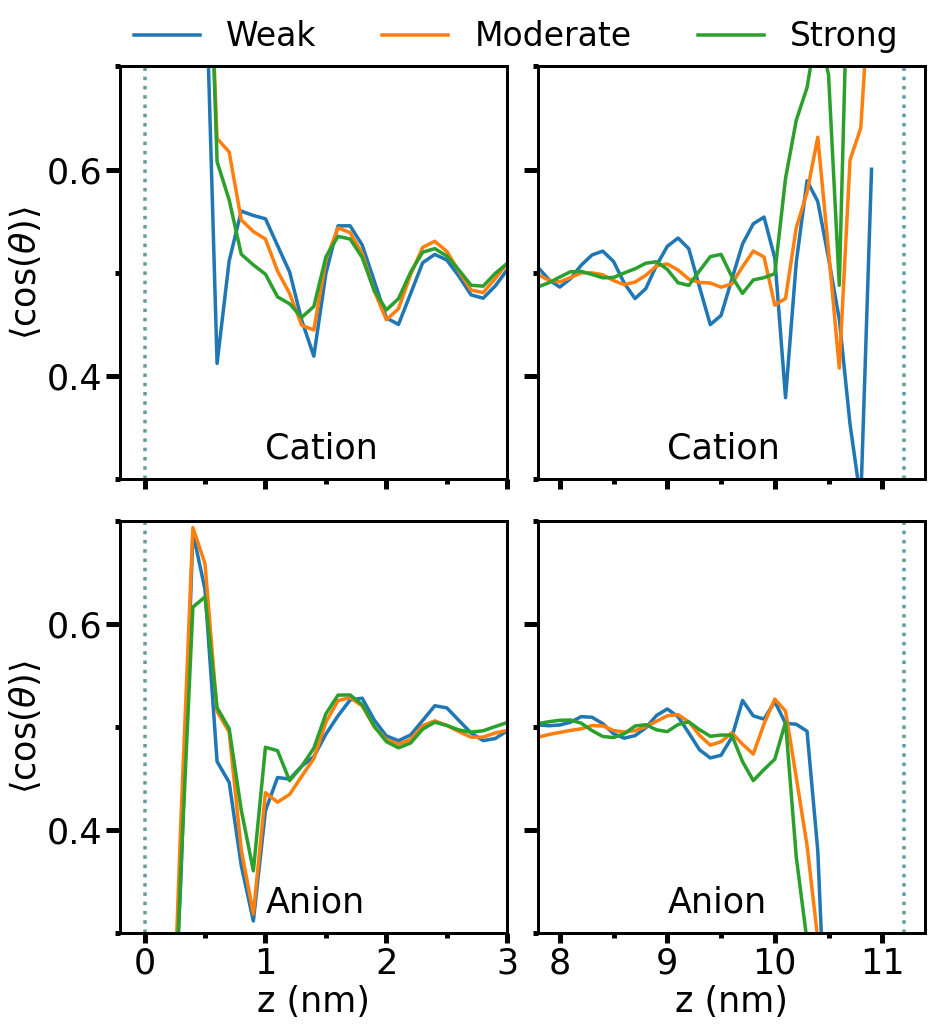

In [41]:
fig, ax = plt.subplots(2,2, figsize=(13,14))

u = "4V"
ax[0,0].plot(density["0.23"][u][:,0]/10- np.array([0.586592705]), density["0.23"][u][:,1], c="C0", label="Weak")
ax[0,0].plot(density["0.51"][u][:,0]/10- np.array([0.586592705]), density["0.51"][u][:,1], c="C1", label="Moderate")
ax[0,0].plot(density["1"][u][:,0]/10- np.array([0.586592705]), density["1"][u][:,1], c="C2", label = "Strong")

ax[0,1].plot(density["0.23"][u][:,0]/10 - np.array([0.586592705]), density["0.23"][u][:,1], c="C0")
ax[0,1].plot(density["0.51"][u][:,0]/10 - np.array([0.586592705]), density["0.51"][u][:,1], c="C1")
ax[0,1].plot(density["1"][u][:,0]/10 - np.array([0.586592705]), density["1"][u][:,1], c="C2")

ax[0,0].axvline(x = electrode[0], linestyle="dotted", color="cadetblue")
ax[0,0].axvline(x = electrode[1], linestyle="dotted", color="cadetblue")
ax[0,0].axvline(x = electrode[2], linestyle="dotted", color="cadetblue")
ax[0,1].axvline(x = electrode[3], linestyle="dotted", color="cadetblue")
ax[0,1].axvline(x = electrode[4], linestyle="dotted", color="cadetblue")
ax[0,1].axvline(x = electrode[5], linestyle="dotted", color="cadetblue")

ax[0,0].xaxis.set_major_locator(MultipleLocator(1))
ax[0,0].xaxis.set_minor_locator(MultipleLocator(0.5))
ax[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax[0,0].yaxis.set_minor_locator(MultipleLocator(0.1))
ax[0,1].xaxis.set_major_locator(MultipleLocator(1))
ax[0,1].xaxis.set_minor_locator(MultipleLocator(0.5))
ax[0,1].yaxis.set_major_locator(MultipleLocator(0.2))
ax[0,1].yaxis.set_minor_locator(MultipleLocator(0.1))

ax[0,0].set_xticklabels([])
ax[0,1].set_xticklabels([])

ax[0,0].set_ylabel(r"$\langle {\mathrm{cos}} (\theta) \rangle$")
ax[0,1].set_yticklabels([])

####################################

u = "4V"
ax[1,0].plot(density["0.23"][u][:,0]/10- np.array([0.586592705]), density["0.23"][u][:,2], c="C0")
ax[1,0].plot(density["0.51"][u][:,0]/10- np.array([0.586592705]), density["0.51"][u][:,2], c="C1")
ax[1,0].plot(density["1"][u][:,0]/10- np.array([0.586592705]), density["1"][u][:,2], c="C2")

ax[1,1].plot(density["0.23"][u][:,0]/10 - np.array([0.586592705]), density["0.23"][u][:,2], c="C0")
ax[1,1].plot(density["0.51"][u][:,0]/10- np.array([0.586592705]), density["0.51"][u][:,2], c="C1")
ax[1,1].plot(density["1"][u][:,0]/10- np.array([0.586592705]), density["1"][u][:,2], c="C2")

ax[1,0].axvline(x = electrode[0], linestyle="dotted", color="cadetblue")
ax[1,0].axvline(x = electrode[1], linestyle="dotted", color="cadetblue")
ax[1,0].axvline(x = electrode[2], linestyle="dotted", color="cadetblue")
ax[1,1].axvline(x = electrode[3], linestyle="dotted", color="cadetblue")
ax[1,1].axvline(x = electrode[4], linestyle="dotted", color="cadetblue")
ax[1,1].axvline(x = electrode[5], linestyle="dotted", color="cadetblue")

ax[1,0].xaxis.set_major_locator(MultipleLocator(1))
ax[1,0].xaxis.set_minor_locator(MultipleLocator(0.5))
ax[1,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax[1,0].yaxis.set_minor_locator(MultipleLocator(0.1))
ax[1,1].xaxis.set_major_locator(MultipleLocator(1))
ax[1,1].xaxis.set_minor_locator(MultipleLocator(0.5))
ax[1,1].yaxis.set_major_locator(MultipleLocator(0.2))
ax[1,1].yaxis.set_minor_locator(MultipleLocator(0.1))

ax[1,0].set_xlabel("z (nm)")
ax[1,1].set_xlabel("z (nm)")
ax[1,0].set_ylabel(r"$\langle {\mathrm{cos}}(\theta) \rangle$")
ax[1,1].set_yticklabels([])

ax[0,0].legend(ncol=3, loc=[0,1])

props = dict(boxstyle='round', facecolor='Black', alpha=0.1)
ax[0,0].text(1., 0.32, "Cation", fontsize=35)#, bbox=props)
ax[0,1].text(9, 0.32, "Cation", fontsize=35)#, bbox=props)

ax[1,0].text(1., 0.32, "Anion", fontsize=35)#, bbox=props)
ax[1,1].text(9, 0.32, "Anion", fontsize=35)#, bbox=props)

ax[0,0].set_xlim(-0.2, 3)
ax[0,1].set_xlim(7.8, 11.4)
ax[1,0].set_xlim(-0.2, 3)
ax[1,1].set_xlim(7.8, 11.4)

ax[0,0].set_ylim(0.3, 0.7)
ax[0,1].set_ylim(0.3, 0.7)
ax[1,0].set_ylim(0.3, 0.7)
ax[1,1].set_ylim(0.3, 0.7)

plt.subplots_adjust(wspace = 0.08, hspace = 0.1, left = 0.13, right = 0.99, bottom = 0.09, top = 0.95)
plt.savefig("profile-orientation_4V.pdf")